# Preprocessing weather data (ARPAFVG)

In [1]:
#Usefull imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Importing the dataset
data2022 = pd.read_csv('../data/arpafvg_fllbandiera_2022.csv',sep=";",header=0)
data2023 = pd.read_csv('../data/arpafvg_fllbandiera_2023.csv',sep=";",header=0)
data2024 = pd.read_csv('../data/arpafvg_fllbandiera_2024.csv',sep=";",header=0)

In [4]:
#Adding the year column
data2022.insert(0, 'anno', 2022)
data2023.insert(0, 'anno', 2023)
data2024.insert(0, 'anno', 2024)

In [5]:
# Concatenating the data
data = pd.concat([data2022, data2023, data2024], ignore_index=True)

In [6]:
# Substitute "-" with NaN
data = data.replace('-', np.nan)

In [7]:
# Forwards filling the NaN values
data = data.fillna(method='ffill')

/tmp/ipykernel_370802/3566069906.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anno                 913 non-null    int64 
 1   mese                 913 non-null    int64 
 2   giorno               913 non-null    int64 
 3   Pioggia mm           913 non-null    object
 4   Temp. min gradi C    913 non-null    object
 5   Temp. med gradi C    913 non-null    object
 6   Temp. max gradi C    913 non-null    object
 7   Umidita' min %       913 non-null    object
 8   Umidita' med %       913 non-null    object
 9   Umidita' max %       913 non-null    object
 10  Vento med km/h       913 non-null    object
 11  Vento max km/h       913 non-null    object
 12  Dir. V. max gradi N  913 non-null    object
 13  Radiaz. KJ/m2        913 non-null    object
 14  Press. med hPa       913 non-null    object
dtypes: int64(3), object(12)
memory usage: 107.1+ KB


In [9]:
# Transform the columns whose Dtype is object to float
for column in data.columns[3:]:
    data[column] = data[column].astype(float)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anno                 913 non-null    int64  
 1   mese                 913 non-null    int64  
 2   giorno               913 non-null    int64  
 3   Pioggia mm           913 non-null    float64
 4   Temp. min gradi C    913 non-null    float64
 5   Temp. med gradi C    913 non-null    float64
 6   Temp. max gradi C    913 non-null    float64
 7   Umidita' min %       913 non-null    float64
 8   Umidita' med %       913 non-null    float64
 9   Umidita' max %       913 non-null    float64
 10  Vento med km/h       913 non-null    float64
 11  Vento max km/h       913 non-null    float64
 12  Dir. V. max gradi N  913 non-null    float64
 13  Radiaz. KJ/m2        913 non-null    float64
 14  Press. med hPa       913 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 1

In [11]:
# Log transform the feature "Pioggia mm"
data["log(Pioggia mm)"] = np.log(data["Pioggia mm"]+1)
# Drop "Pioggia mm"
data.drop('Pioggia mm', inplace=True, axis = 1)

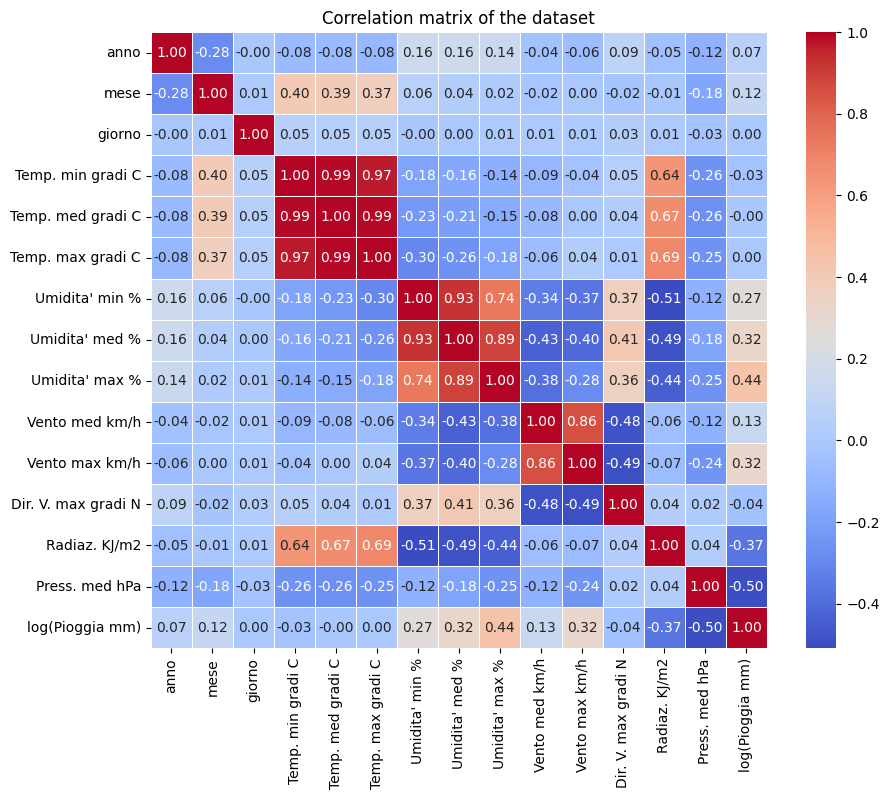

In [12]:
# Plot correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation matrix of the dataset')
plt.show()

In [13]:
# Get the features with low information: correlation > 0.9
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Highly correlated features:",correlated_features)

Highly correlated features: {'Temp. max gradi C', "Umidita' med %", 'Temp. med gradi C'}


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anno                 913 non-null    int64  
 1   mese                 913 non-null    int64  
 2   giorno               913 non-null    int64  
 3   Temp. min gradi C    913 non-null    float64
 4   Temp. med gradi C    913 non-null    float64
 5   Temp. max gradi C    913 non-null    float64
 6   Umidita' min %       913 non-null    float64
 7   Umidita' med %       913 non-null    float64
 8   Umidita' max %       913 non-null    float64
 9   Vento med km/h       913 non-null    float64
 10  Vento max km/h       913 non-null    float64
 11  Dir. V. max gradi N  913 non-null    float64
 12  Radiaz. KJ/m2        913 non-null    float64
 13  Press. med hPa       913 non-null    float64
 14  log(Pioggia mm)      913 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 1

In [17]:
#Save the dataset
data.to_csv('../data/big_arpafvg.csv', index=False)